### Problem Statement:

Modeling historical credit card transactions with information of those that turned out to be fraudulent is part of the Credit Card Fraud Detection Problem. The model is then used to determine whether or not a new transaction is fraudulent. Our goal is to detect fraudulent transactions with highest accuracy possible while reducing the number of inaccurate fraud classifications.

### Objectives:

When someone uses another person's credit card or account details to make illicit purchases or get funds through cash advances, this is known as credit card fraud.

Credit card fraud does not only occur online; it also occurs in physical establishments. The main objective of the problem is to spot the potential fraudulent usage of credit cards in your payment environment as a business owner and make you avoid severe hassles — and unfavourable exposure.

### Dataset Description

In [1]:
# Library import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
dt = pd.read_csv("creditcard.csv")
dt.head()
dt.shape

(284807, 31)

In [10]:
dt.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.

The count of non-fraudlent transactions are significantly higher than the fraudlent transactions and this causes an
imbalance in the dataset. The usage of such dataset for building models will assume that the analysis  will have a lot of
and our alorithms will probably overfit. We want our model to discover patterns in fraud detection rather a assumed transaction.

In [5]:
dt.skew()

# Inference:
# As we know that a value above 1 is skewed, there is a lot of data that is skewed in our dataset. So we have to use models, that can handle with skewed data.

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [6]:
dt.kurtosis()

# Inferences:
# The normal range is <|1|. As we see from the results, the dataset consists variables having high kurtosis values.

Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V13         0.195300
V14        23.879462
V15         0.284769
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V24         0.618871
V25         4.290412
V26         0.919006
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

## 1. EDA - Exploratory Data Analysis

In [3]:
dt.info()

## Inference: there are no null values present in the entire dataset and hence there is no nececessity to handle null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
dt.isnull().sum().sum()

0

In [7]:
pd.set_option("display.float", "{:.2f}".format)
## Restricting the display of float types to 2 decimals

dt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [8]:
columns  = list(dt.columns)

Text(0, 0.5, 'Count')

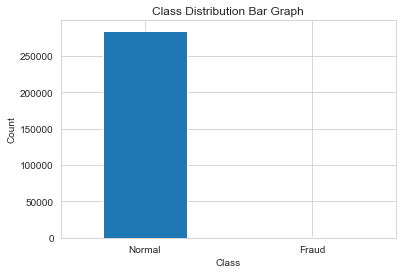

In [9]:
class_cat = ["Normal", "Fraud"]

count_class = pd.value_counts(dt['Class'], sort = True)
count_class.plot(kind = 'bar', rot=0)
plt.title("Class Distribution Bar Graph")
plt.xticks(range(2), class_cat)
plt.xlabel("Class")
plt.ylabel("Count")

In [11]:
# To determine the number of fraud and valid transactions in the data

fraud = dt[dt['Class']==1]
normal = dt[dt['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [12]:
# Describing the amount in different transaction classes

pd.concat([fraud.Amount.describe(), normal.Amount.describe()],axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


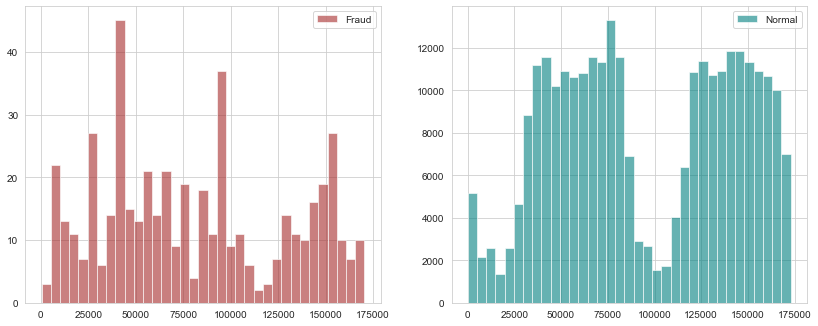

In [13]:
# Is there any pattern in timeframe where fraudulent transactions occur?

# dt[dr.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
dt[dt.Class == 1].Time.hist(bins=35, color='brown', alpha=0.6, label="Fraud")
plt.legend()

plt.subplot(2, 2, 2)
dt[dt.Class == 0].Time.hist(bins=35, color='teal', alpha=0.6, label="Normal")
plt.legend()

<AxesSubplot:>

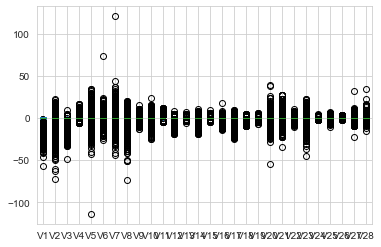

In [14]:
dt.boxplot(columns[1:29])

## 2. Inferences on Relationship between variables

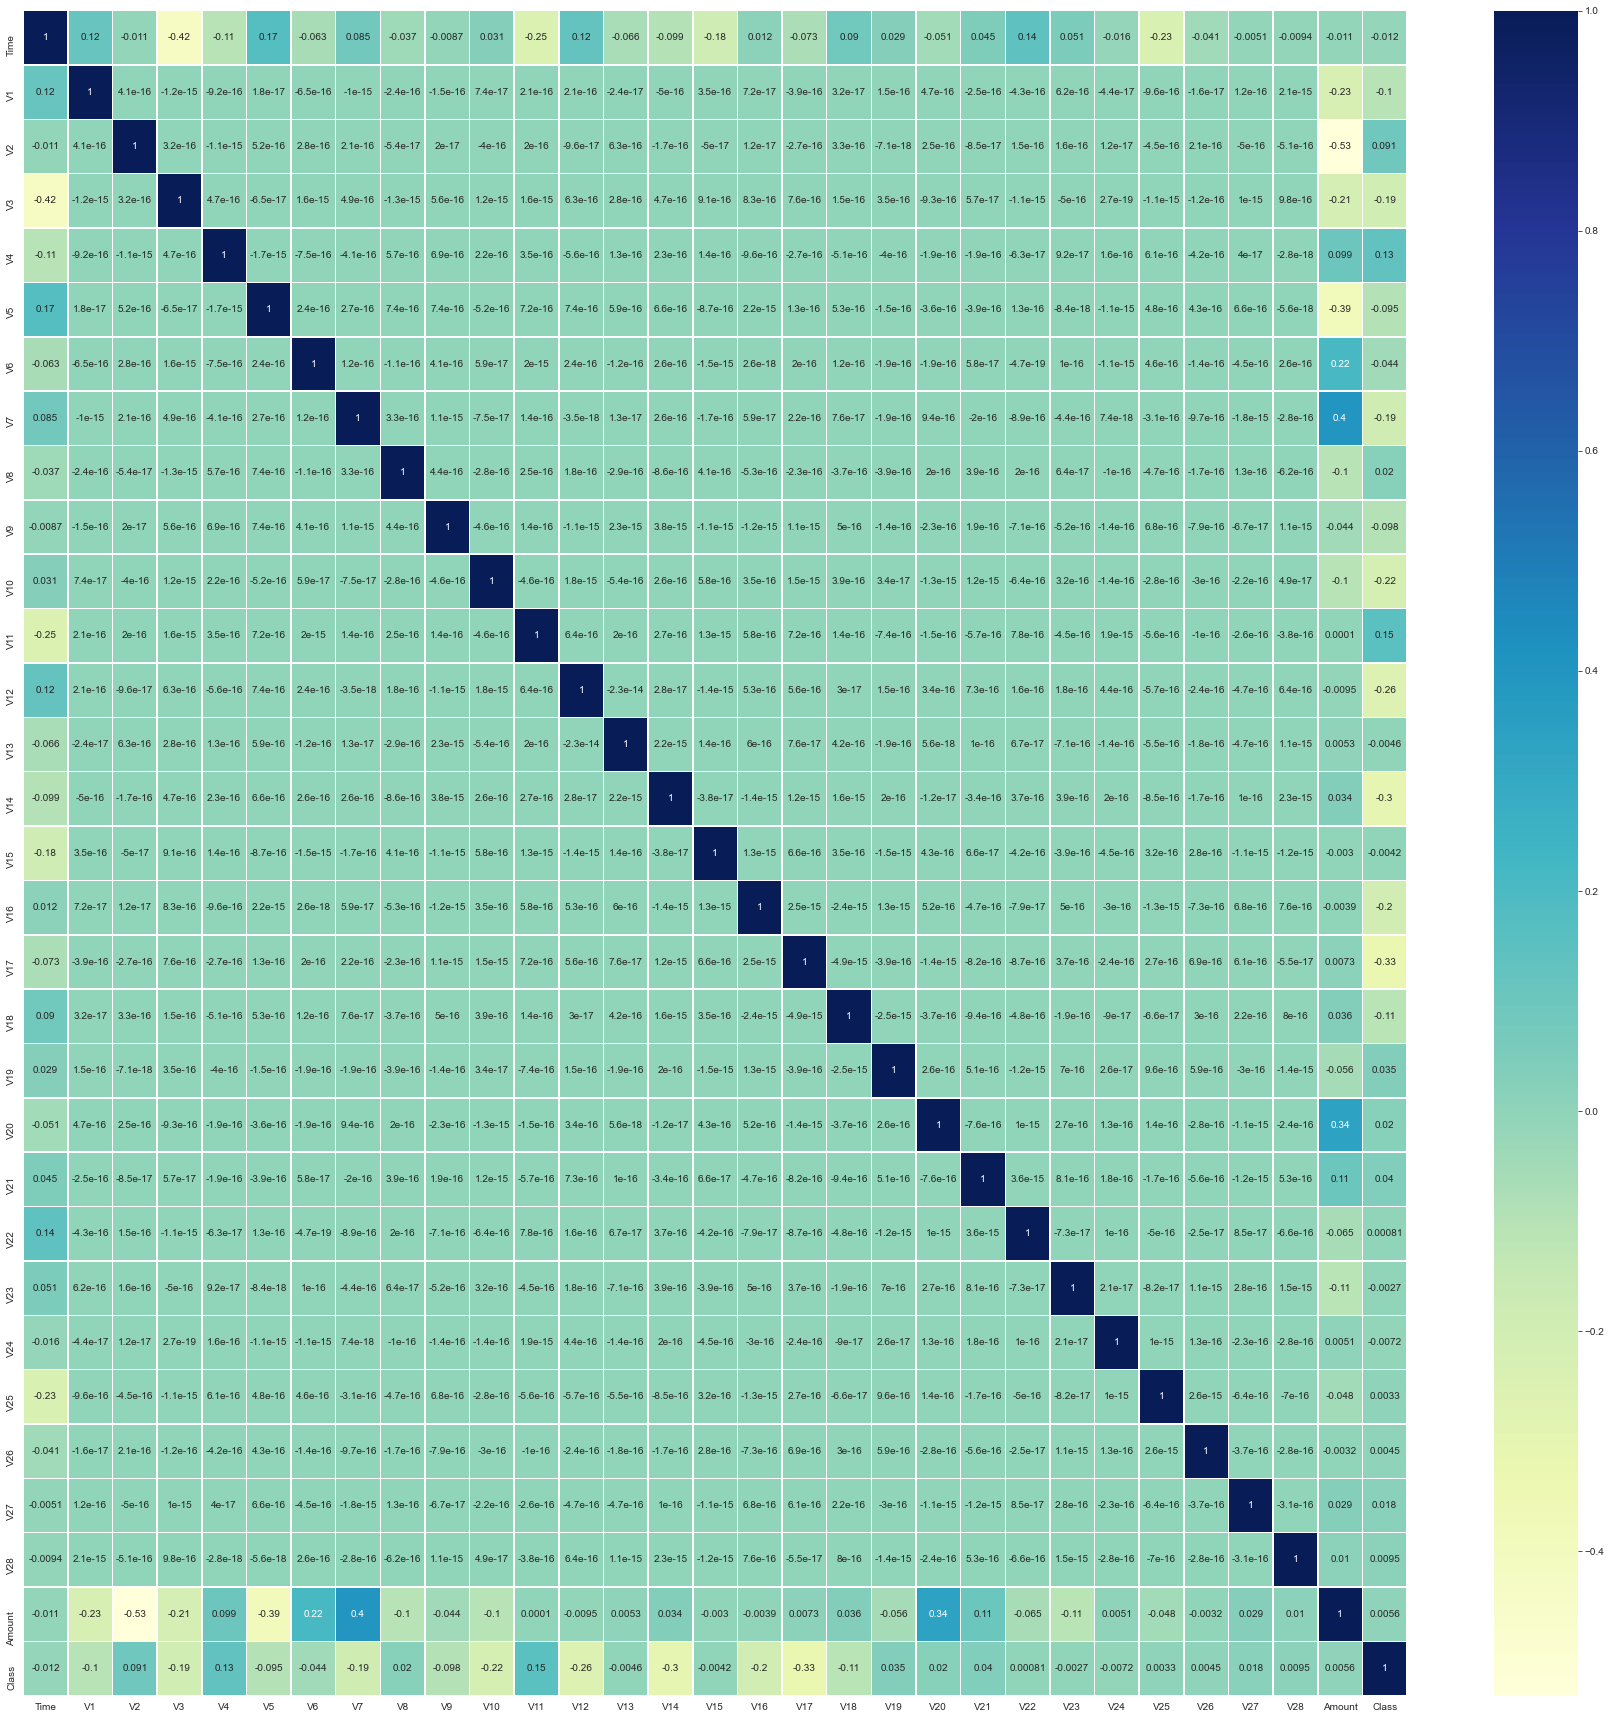

In [15]:
# Correlation map

plt.figure(figsize=(31,31))
sns.heatmap(dt.corr(), cmap="YlGnBu",linewidths=.5,annot=True)
plt.show()

# Inferences:
## None of the V1 to V28 components have high correlation with one another. This indicates that that there is a less risk of multicollinearity when these variables are considered as features.
## Class is incurring no high correlation with Amount or Time.

In [16]:
dt.corr()

# Inferences:
# - Time & V3 (-0.42)
# - Amount & V2 (-0.53)
# - Amount & V4 (0.4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


### 3. Data Cleaning, Transformation, Data Preperation

#### Handling Outliers

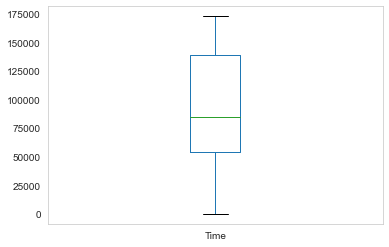

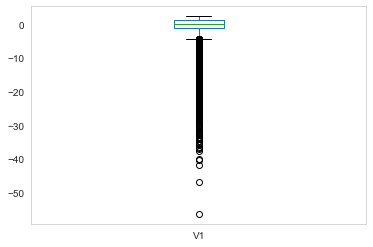

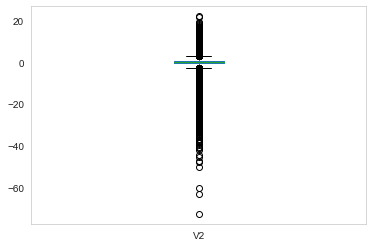

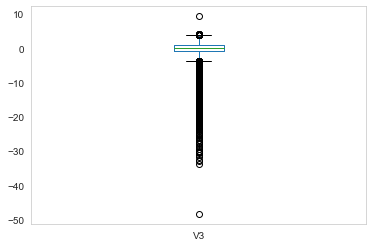

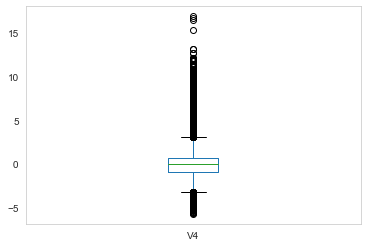

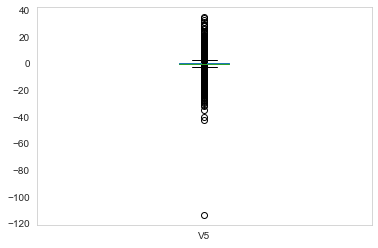

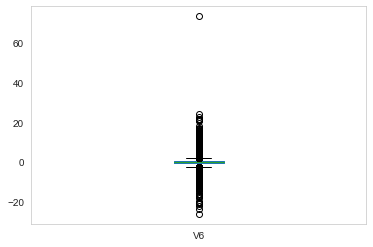

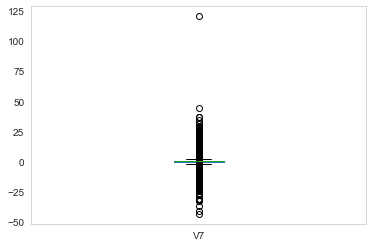

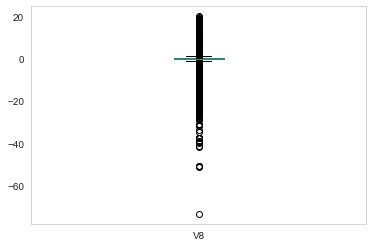

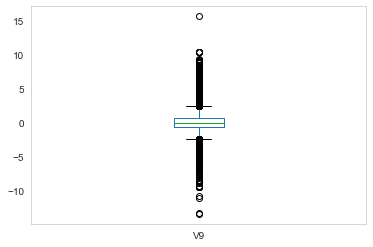

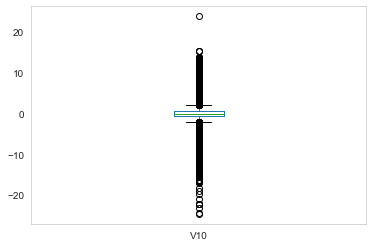

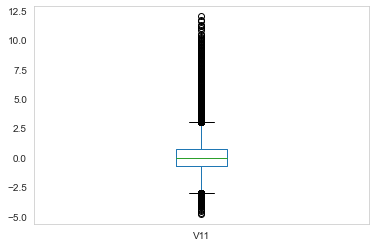

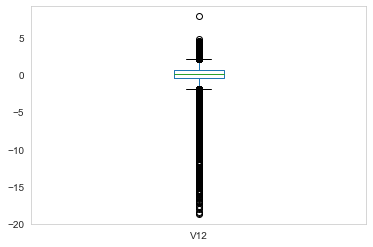

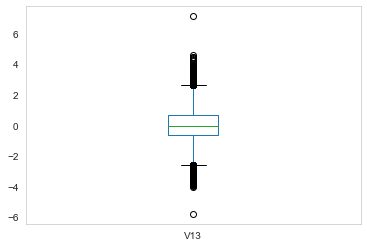

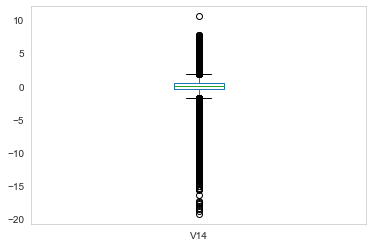

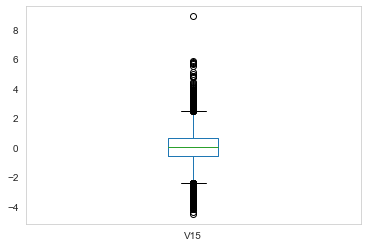

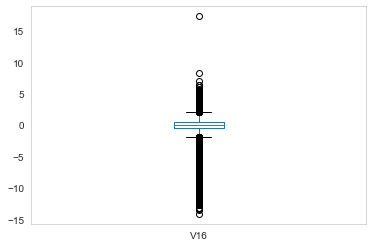

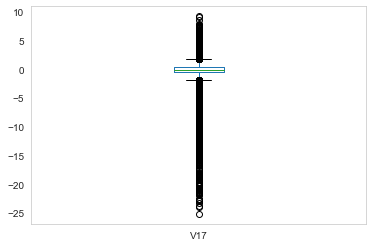

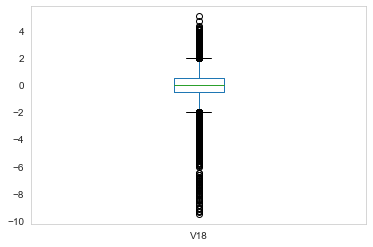

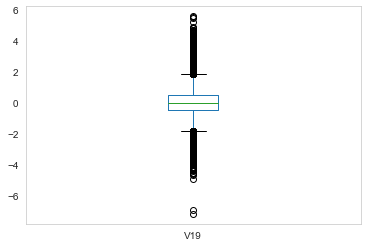

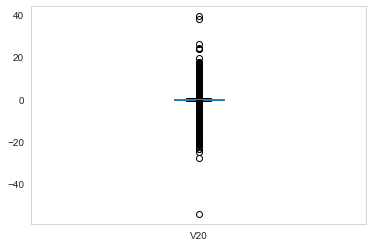

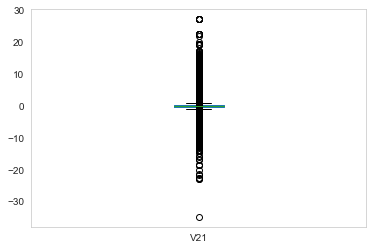

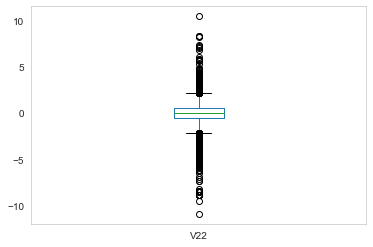

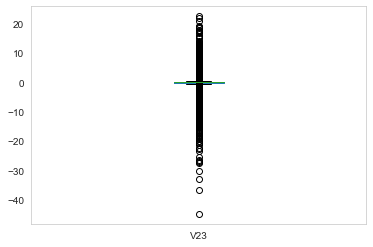

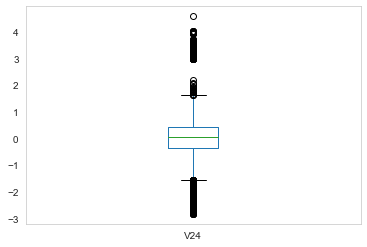

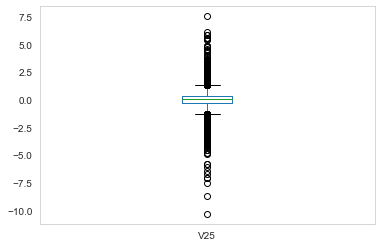

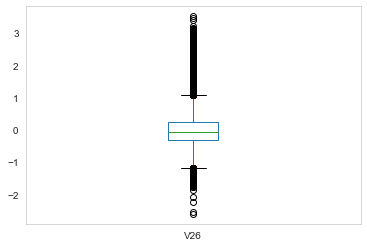

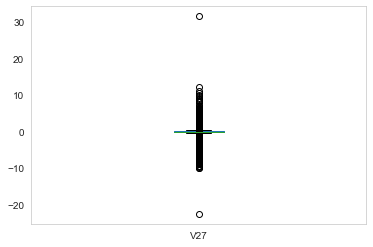

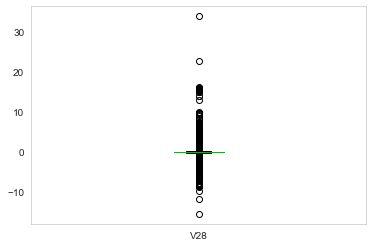

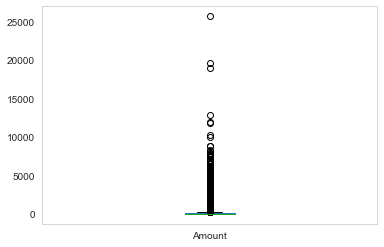

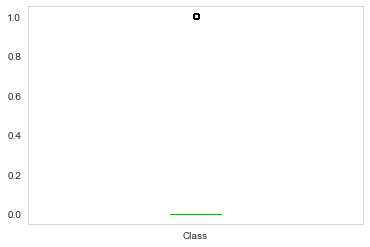

In [17]:
def plot_box(data,feature):
    dt.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

for i in columns:
    plot_box(dt,i)

# Inferences:
# Removing each and every outlier is not possible as the count of outliers is huge in each case, let's fix a threshold that is feasible in this situation.
# Threshold of 7 is giving an outlier number as 12,303 which is around 4.3% of the available data. The percentage of outliers is very large but considering the size of the data set, it seems like we are good to go with dropping the rows containing outliers. The final dataset is large enough to get the modelling done.

In [18]:
def outliers(data,feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    low_lim = Q1 - 7*IQR
    up_lim = Q3 + 7*IQR
    ls = data.index[(data[feature] < low_lim) | (data[feature] > up_lim)]
    return ls

In [19]:
index_ls = []
for i in columns[1:29]:
    index_ls.extend(outliers(dt,i))
index_ls = set(index_ls)
len(index_ls)

12303

In [20]:
def remove(data,ls):
    ls = sorted(ls)
    data = data.drop(ls)
    return data

In [21]:
clean = remove(dt,index_ls)

In [22]:
clean.shape

(272504, 31)

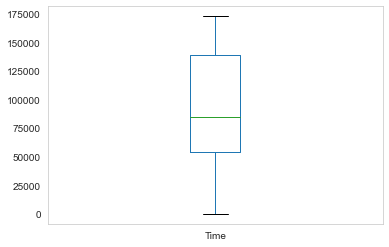

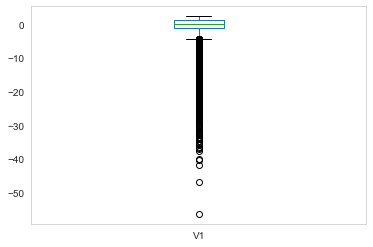

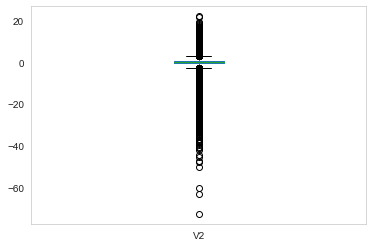

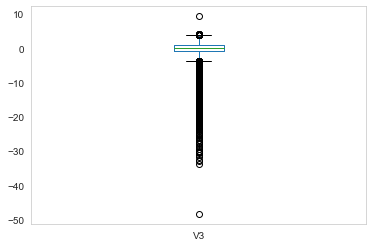

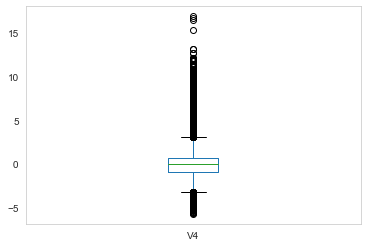

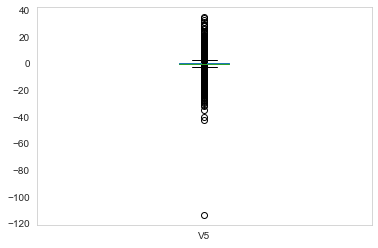

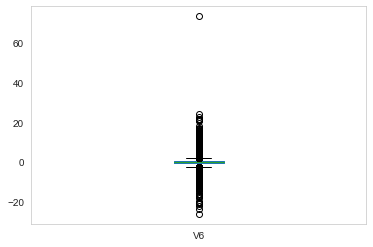

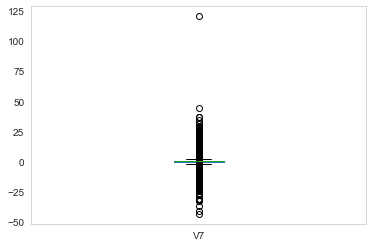

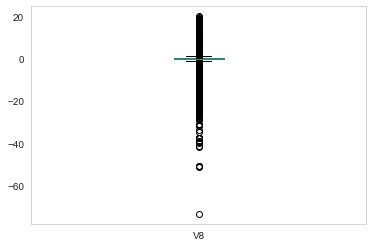

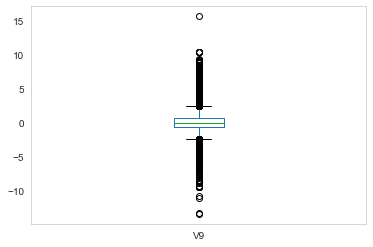

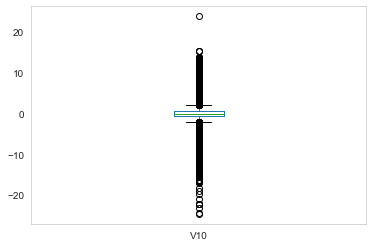

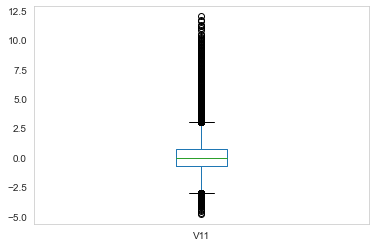

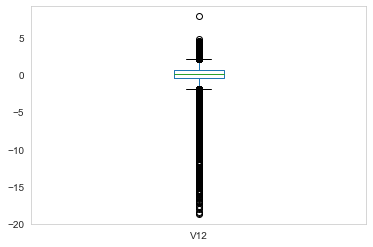

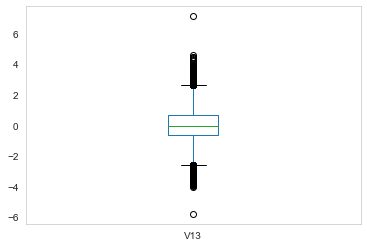

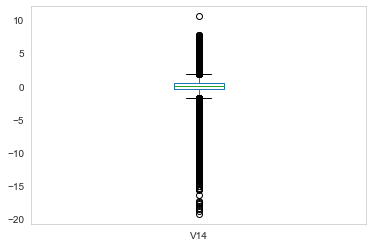

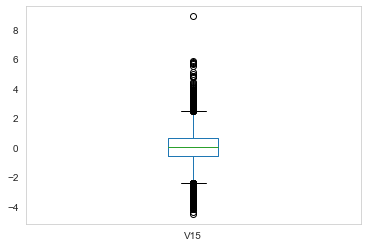

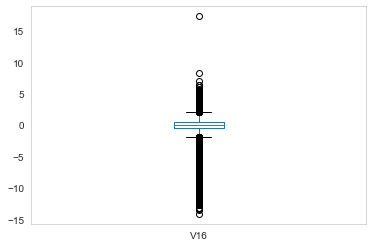

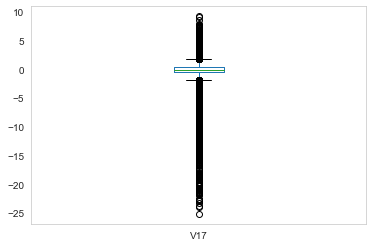

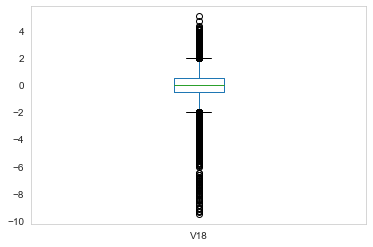

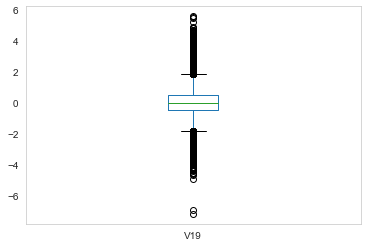

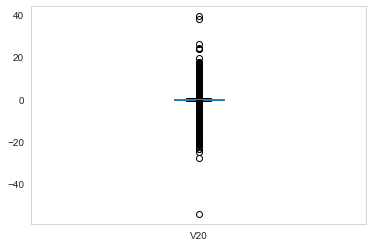

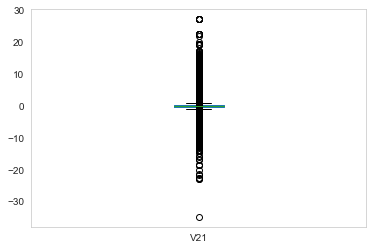

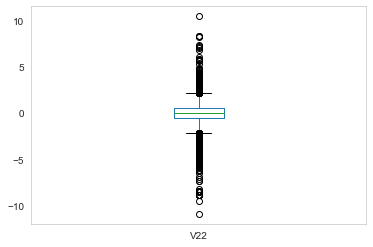

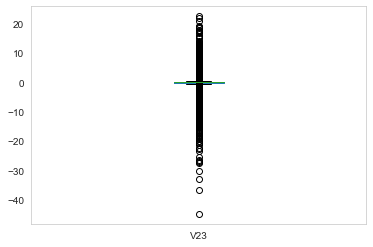

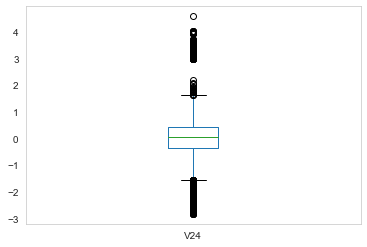

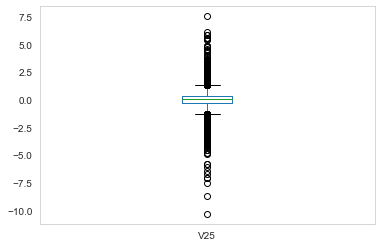

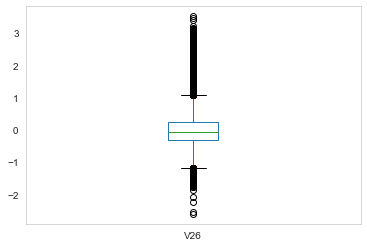

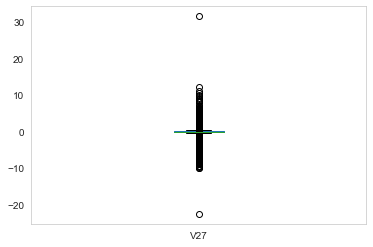

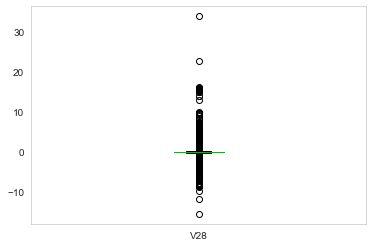

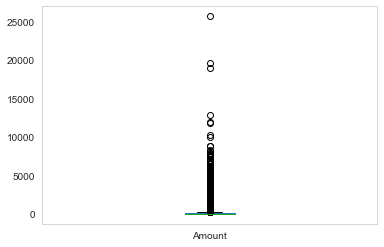

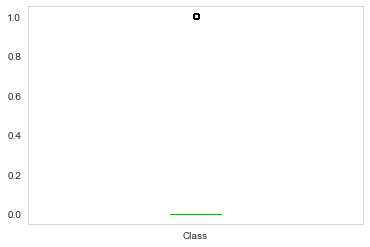

In [23]:
for i in columns:
    plot_box(clean,i)

### Data Pre-processing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
scale = StandardScaler()

# Only time and amount are to be scaled as the other columns.

X = clean.drop('Class', axis=1)
y = clean.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, test_size=0.2, random_state=42)

# 

X_train = scale.fit_transform(X_train)
X_validate = scale.transform(X_validate)
X_test = scale.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.000596326367454997
Non-Fraudulant transaction weight: 0.999403673632545


In [26]:
print(f"TRAINING - X_train: {X_train.shape}, y_train: {y_train.shape}\n{'-'*60}")
print(f"VALIDATION - X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'-'*50}")
print(f"TESTING - X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING - X_train: (152601, 30), y_train: (152601,)
------------------------------------------------------------
VALIDATION - X_validate: (38151, 30), y_validate: (38151,)
--------------------------------------------------
TESTING - X_test: (81752, 30), y_test: (81752,)


In [30]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

### 4. Models Selected

##### 1. Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

rn = RandomForestClassifier(n_estimators=100, oob_score=False)
rn.fit(X_train, y_train)

y_train_pred = rn.predict(X_train)
y_test_pred = rn.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

print(cohen_kappa_score(y_test,y_test_pred))
y_pred_proba_rn = rn.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba_rn[:,1]))

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0     1  accuracy  macro avg  weighted avg
precision      1.00  1.00      1.00       1.00          1.00
recall         1.00  1.00      1.00       1.00          1.00
f1-score       1.00  1.00      1.00       1.00          1.00
support   152510.00 91.00      1.00  152601.00     152601.00
_______________________________________________
Confusion Matrix: 
 [[152510      0]
 [     0     91]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0     1  accuracy  macro avg  weighted avg
precision     1.00  0.96      1.00       0.98          1.00
recall        1.00  0.44      1.00       0.72          1.00
f1-score      1.00  0.60      1.00       0.80          1.00
support   81695.00 57.00      1.00   81752.00      81752.00
_______________________________________________
Confusion Matrix: 
 [[81694

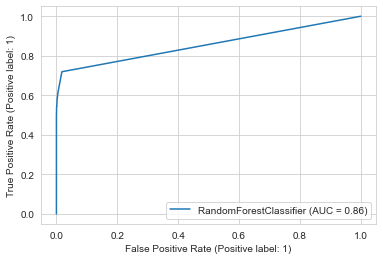

In [40]:
plot_roc_curve(rn,X_test,y_test)

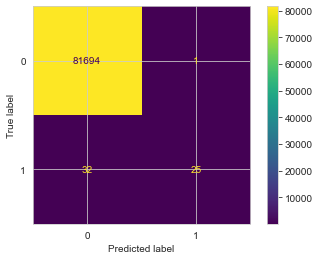

In [41]:
plot_confusion_matrix(rn,X_test,y_test)

In [42]:
print(accuracy_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.9995963401506996
0.9615384615384616


##### 2. XGBoost

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

print(cohen_kappa_score(y_test,y_test_pred))
y_pred_proba_xgb = xgb.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba_xgb[:,1]))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0     1  accuracy  macro avg  weighted avg
precision      1.00  1.00      1.00       1.00          1.00
recall         1.00  1.00      1.00       1.00          1.00
f1-score       1.00  1.00      1.00       1.00          1.00
support   152510.00 91.00      1.00  152601.00     152601.00
_______________________________________________
Confusion Matrix: 
 [[152510      0]
 [     0     91]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0     1  accuracy  macro avg  weighted avg
precision     1.00  0.92      1.00       0.96          1.00
recall        1.00  0.42      1.00       0.71          1.00
f1-score      1.00  0.58      1.00       0.79          1.00
support   81695.00 57.00      1.00   81752.00      81752.00
_______________________________________________
Confusion Matrix: 
 [[81693

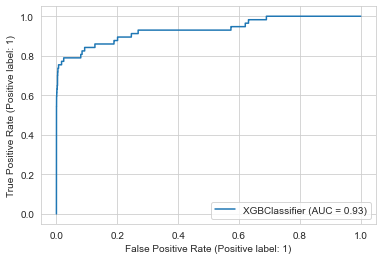

In [44]:
plot_roc_curve(xgb,X_test,y_test)

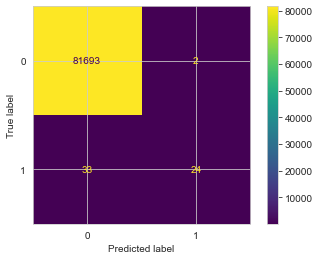

In [46]:
plot_confusion_matrix(xgb,X_test,y_test)

In [47]:
print(accuracy_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.9995718759174087
0.9230769230769231
